# Running the optimizer with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import Himmelblau

himmelblau = Himmelblau()

In [2]:
boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=himmelblau.dofs, 
                                             dets=[],
                                             bounds=himmelblau.bounds, 
                                             db=db, 
                                             experiment=himmelblau,
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


Transient Scan ID: 1     Time: 2023-04-25 18:16:34
Persistent Unique Scan ID: '31534122-1306-46d3-8a82-595e452038ee'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+


|         1 | 18:16:34.3 |      0.176 |     -1.281 |
|         2 | 18:16:34.4 |     -1.074 |     -2.392 |
|         3 | 18:16:34.4 |      2.676 |     -3.503 |
|         4 | 18:16:34.4 |      3.926 |      0.941 |
|         5 | 18:16:34.4 |      1.426 |      3.164 |
|         6 | 18:16:34.4 |     -2.324 |      2.052 |
|         7 | 18:16:34.4 |     -3.574 |     -0.170 |
|         8 | 18:16:34.4 |     -4.824 |     -4.614 |
+-----------+------------+------------+------------+
generator list_scan ['31534122'] (scan num: 1)





         x1        x2     fitness
0  0.176367 -1.280899 -176.920226
1 -1.073633 -2.392010 -155.332517
2  2.676367 -3.503121 -117.052540
3  3.926367  0.941323  -33.490055
4  1.426367  3.163546  -53.326221
5 -2.323633  2.052435  -38.714193
6 -3.573633 -0.169788 -113.756347
7 -4.823633 -4.614232 -148.205228


('31534122-1306-46d3-8a82-595e452038ee',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer:

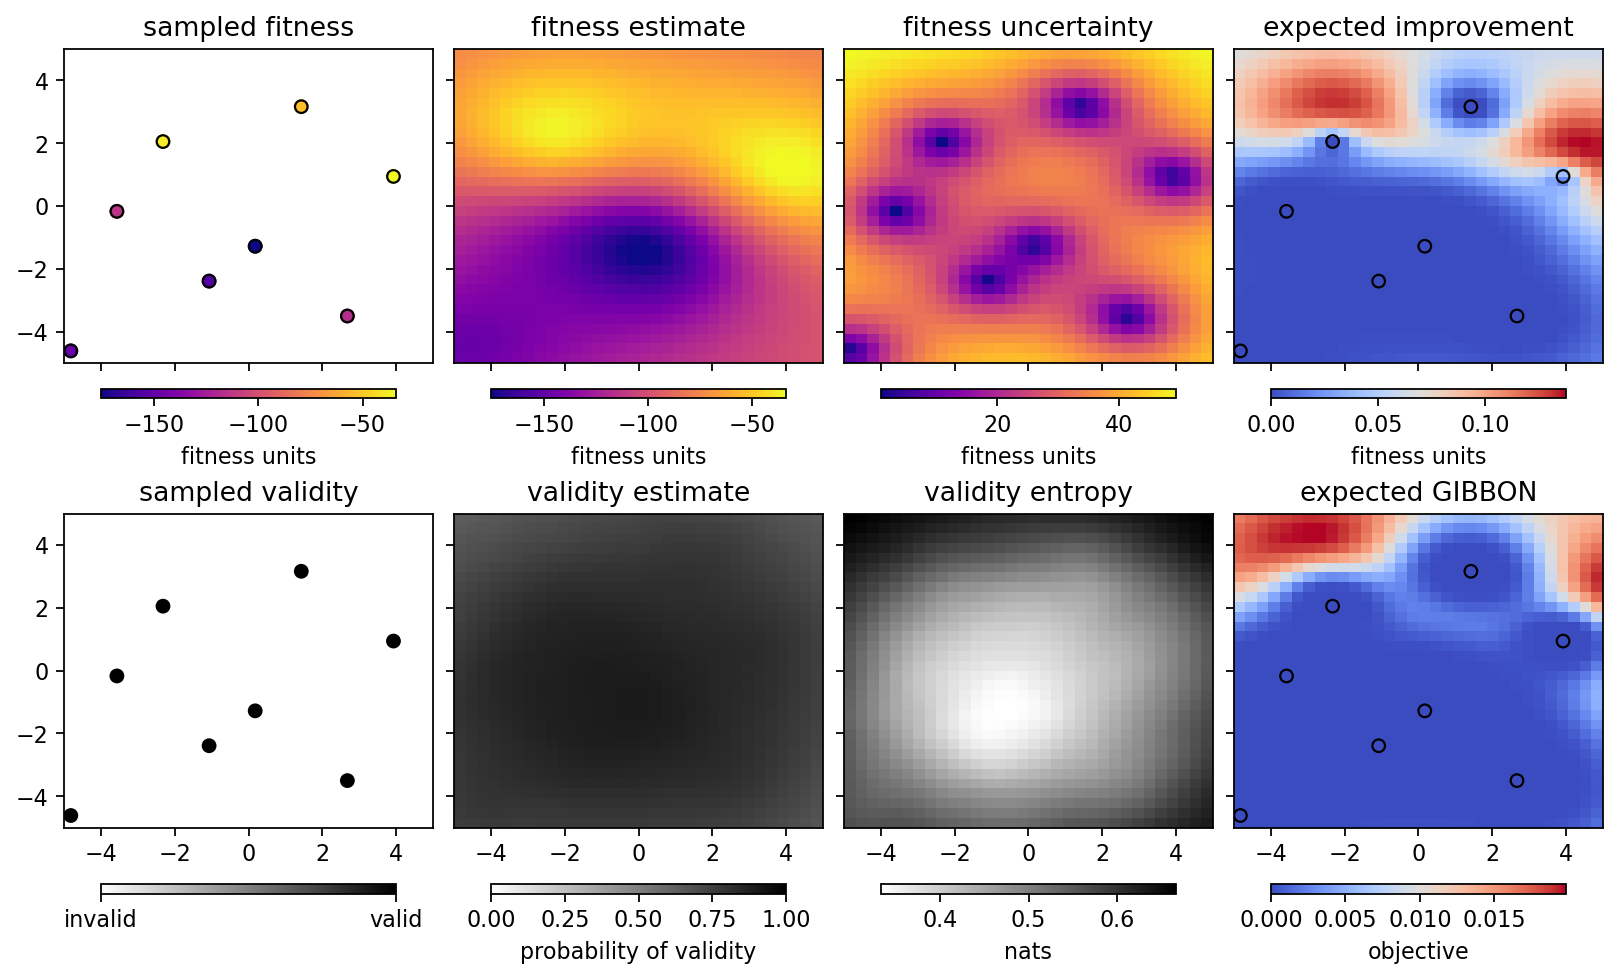

In [3]:
boa.plot_state(gridded=True)

Now let's try the "EI" strategy to sample where we expect the largest improvement in the fitness:

learning with strategy "eI" ...




Transient Scan ID: 2     Time: 2023-04-25 18:16:41
Persistent Unique Scan ID: 'f6f0cdbd-62ad-4dbf-ae1d-f6211520ff66'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:16:41.6 |      4.961 |     -0.770 |
|         2 | 18:16:41.6 |      4.521 |      1.973 |
|         3 | 18:16:41.6 |      3.213 |      1.345 |
|         4 | 18:16:41.6 |     -1.813 |      4.085 |
+-----------+------------+------------+------------+
generator list_scan ['f6f0cdbd'] (scan num: 2)





          x1        x2     fitness
8   4.960759 -0.769839 -166.939936
9   4.520892  1.973478 -132.236059
10  3.212791  1.345443   -4.354008
11 -1.812633  4.084749  -75.150947


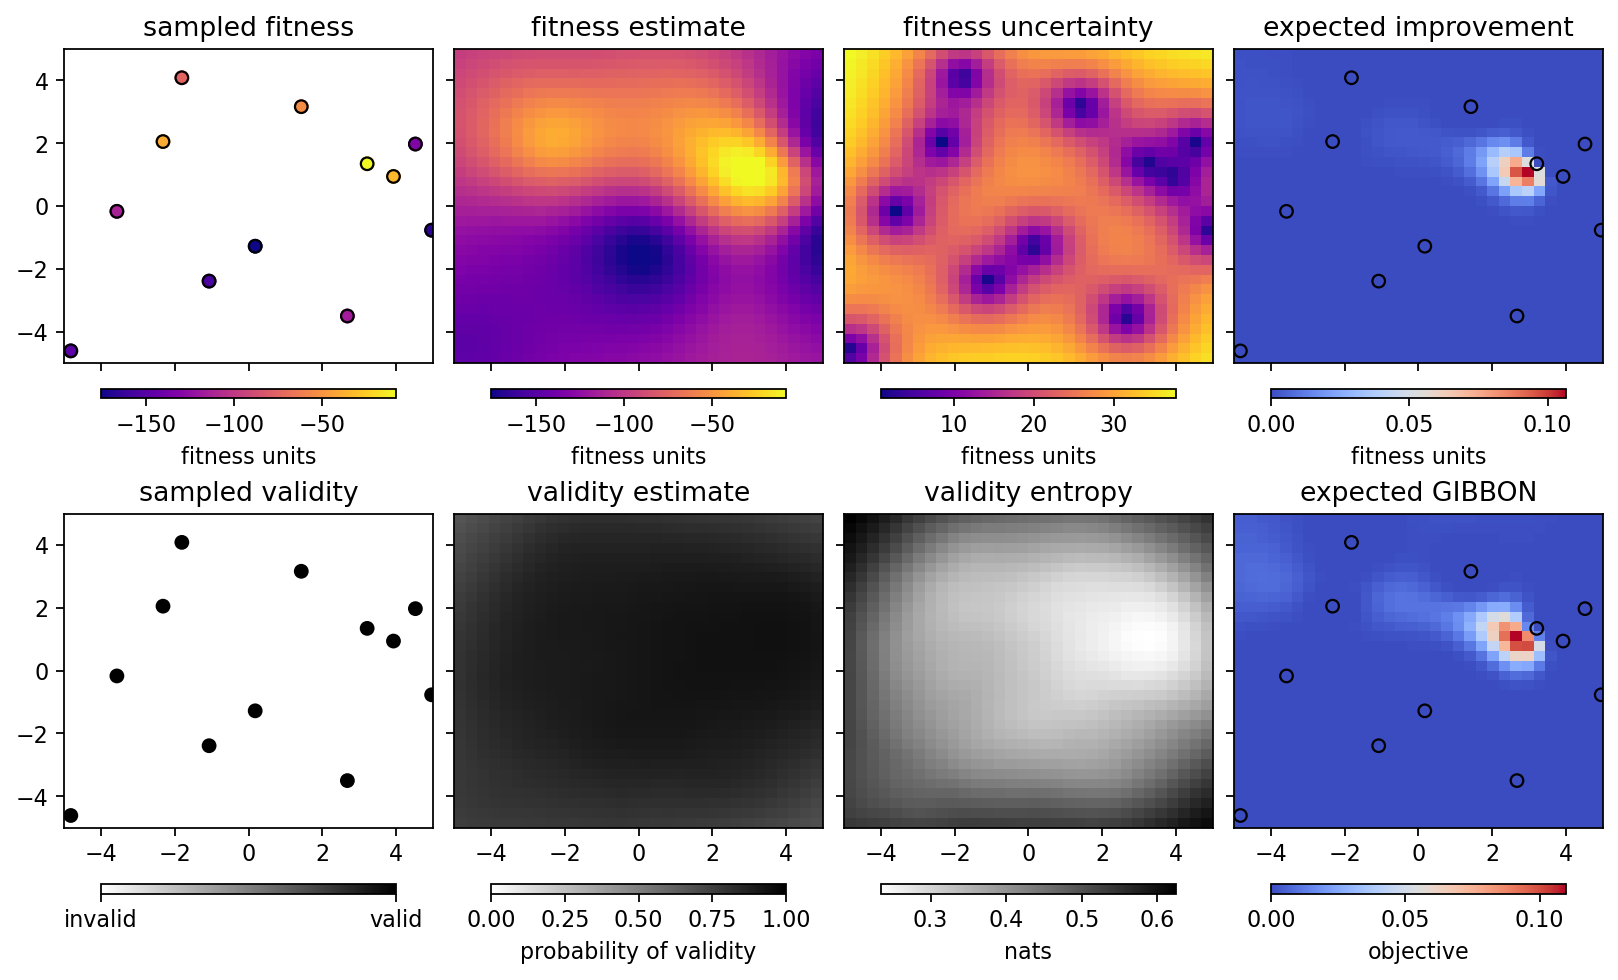

In [4]:
RE(boa.learn(strategy='eI', n_iter=1, n_per_iter=4))
boa.plot_state(gridded=True)

Let's learn a bit more, using the "GIBBON" framework to investigate points that are likely to tell us about the optimum. Running two iterations with four points per iteration:

learning with strategy "eGIBBON" ...




Transient Scan ID: 3     Time: 2023-04-25 18:16:48
Persistent Unique Scan ID: '6f8ca64d-96e1-4828-b003-46a132889d22'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:16:48.9 |     -4.903 |      3.542 |
|         2 | 18:16:48.9 |      2.588 |      5.000 |
|         3 | 18:16:48.9 |      2.598 |      1.790 |
|         4 | 18:16:48.9 |      2.752 |      1.073 |
+-----------+------------+------------+------------+
generator list_scan ['6f8ca64d'] (scan num: 3)





          x1        x2     fitness
12 -4.903445  3.542224 -275.509950
13  2.587841  4.999842 -424.279565
14  2.598305  1.790386   -7.474786
15  2.751975  1.073415  -15.121662




Transient Scan ID: 4     Time: 2023-04-25 18:16:52
Persistent Unique Scan ID: 'bc5cd6c4-e8de-4735-bce3-144ed130b262'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:16:52.5 |      1.601 |      1.947 |
|         2 | 18:16:52.5 |     -0.082 |      1.990 |
|         3 | 18:16:52.5 |      0.359 |     -4.924 |
|         4 | 18:16:52.5 |      4.991 |     -4.612 |
+-----------+------------+------------+------------+
generator list_scan ['bc5cd6c4'] (scan num: 4)





          x1        x2     fitness
16  1.601004  1.947361  -44.694400
17 -0.081690  1.989935  -90.807021
18  0.358592 -4.923510 -559.223326
19  4.990624 -4.611892 -457.340695




Transient Scan ID: 5     Time: 2023-04-25 18:16:56
Persistent Unique Scan ID: '1a150780-449d-4202-a174-e194aa4f34d5'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:16:56.0 |      2.855 |     -1.325 |
|         2 | 18:16:56.0 |      2.886 |      1.648 |
|         3 | 18:16:56.0 |     -1.640 |      0.088 |
|         4 | 18:16:56.0 |     -4.791 |     -1.944 |
+-----------+------------+------------+------------+
generator list_scan ['1a150780'] (scan num: 5)





          x1        x2     fitness
20  2.854590 -1.325008  -23.152666
21  2.885845  1.647940   -3.004152
22 -1.640213  0.087552 -142.124613
23 -4.791198 -1.943717 -164.448055




Transient Scan ID: 6     Time: 2023-04-25 18:16:59
Persistent Unique Scan ID: '4d349f8b-24d1-4fb2-9c4b-6206f6be8b5c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:16:59.6 |      2.207 |     -2.149 |
|         2 | 18:16:59.6 |      3.314 |     -1.825 |
|         3 | 18:16:59.6 |      3.019 |     -0.138 |
|         4 | 18:16:59.6 |     -1.488 |      2.748 |
+-----------+------------+------------+------------+
generator list_scan ['4d349f8b'] (scan num: 6)





          x1        x2    fitness
24  2.207357 -2.149272 -68.536244
25  3.314046 -1.825348  -3.519970
26  3.018732 -0.137578 -19.800107
27 -1.488413  2.747646 -37.326585


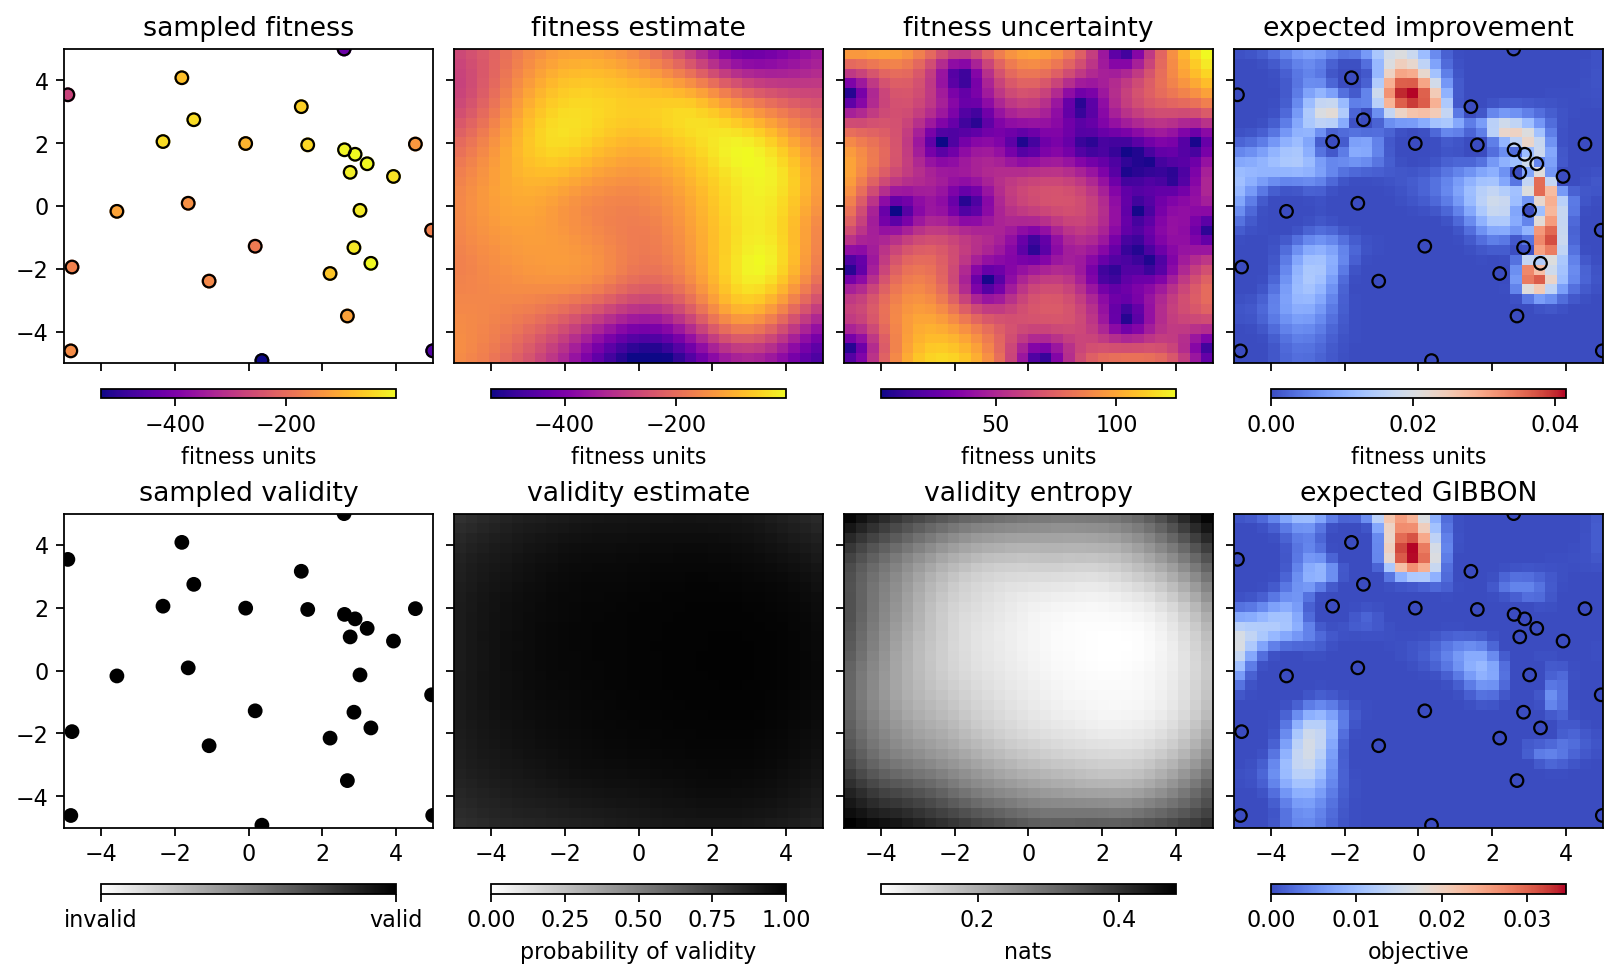

In [5]:
RE(boa.learn(strategy='eGIBBON', n_iter=4, n_per_iter=4))
boa.plot_state(gridded=True)

Eventually, we reach a point of saturation where no more improvement takes place:

learning with strategy "eGIBBON" ...




Transient Scan ID: 7     Time: 2023-04-25 18:17:07
Persistent Unique Scan ID: '1ca14044-1b26-43c5-b305-68ea8d362403'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:07.0 |     -0.228 |      3.724 |
|         2 | 18:17:07.0 |     -2.518 |      3.077 |
|         3 | 18:17:07.0 |     -4.932 |      1.340 |
|         4 | 18:17:07.0 |      3.138 |     -2.091 |
+-----------+------------+------------+------------+
generator list_scan ['1ca14044'] (scan num: 7)





          x1        x2     fitness
28 -0.228384  3.724479  -96.311148
29 -2.518185  3.077236   -2.503543
30 -4.931554  1.340466 -317.648180
31  3.137606 -2.091263  -10.802104




Transient Scan ID: 8     Time: 2023-04-25 18:17:10
Persistent Unique Scan ID: '90439e91-a7d0-419f-af9d-61d0249a2e8d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:10.8 |      3.514 |     -1.030 |
|         2 | 18:17:10.8 |      3.314 |      0.614 |
|         3 | 18:17:10.8 |      2.202 |     -0.015 |
|         4 | 18:17:10.8 |     -2.180 |      2.859 |
+-----------+------------+------------+------------+
generator list_scan ['90439e91'] (scan num: 8)





          x1        x2    fitness
32  3.514480 -1.030441  -5.977497
33  3.314213  0.613756 -11.307402
34  2.202155 -0.015163 -61.032701
35 -2.179672  2.859198 -12.500309




Transient Scan ID: 9     Time: 2023-04-25 18:17:14
Persistent Unique Scan ID: 'dc0c51c6-a4e6-4553-8bc7-574ad6d50564'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:14.5 |     -3.422 |      4.982 |
|         2 | 18:17:14.5 |      2.967 |      2.549 |
|         3 | 18:17:14.5 |      3.543 |     -0.342 |
|         4 | 18:17:14.5 |     -2.934 |     -1.901 |
+-----------+------------+------------+------------+
generator list_scan ['dc0c51c6'] (scan num: 9)





          x1        x2     fitness
36 -3.422456  4.982104 -239.764920
37  2.966508  2.549267   -6.199649
38  3.543129 -0.342269  -12.621465
39 -2.933780 -1.901336  -58.366733




Transient Scan ID: 10     Time: 2023-04-25 18:17:18
Persistent Unique Scan ID: 'bc961169-2b2a-4a1f-8e75-769d55815783'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:18.2 |     -3.087 |     -3.404 |
|         2 | 18:17:18.2 |     -2.128 |     -1.370 |
|         3 | 18:17:18.2 |      2.745 |      2.278 |
|         4 | 18:17:18.2 |      3.309 |      2.119 |
+-----------+------------+------------+------------+
generator list_scan ['bc961169'] (scan num: 10)





          x1        x2     fitness
40 -3.086667 -3.404467  -26.045839
41 -2.128179 -1.370130 -114.056943
42  2.744528  2.278231   -2.288494
43  3.308825  2.118972   -4.911891




Transient Scan ID: 11     Time: 2023-04-25 18:17:22
Persistent Unique Scan ID: '1d7b1068-5e9d-4952-bd0d-6e1937014a18'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:22.1 |      3.001 |      1.939 |
|         2 | 18:17:22.1 |     -2.501 |     -2.802 |
|         3 | 18:17:22.1 |     -3.821 |     -3.053 |
|         4 | 18:17:22.1 |     -3.288 |     -4.974 |
+-----------+------------+------------+------------+
generator list_scan ['1d7b1068'] (scan num: 11)





          x1        x2     fitness
44  3.001040  1.939207   -0.059827
45 -2.501227 -2.801626  -59.663895
46 -3.820532 -3.052948   -2.545535
47 -3.287641 -4.974264 -235.650338




Transient Scan ID: 12     Time: 2023-04-25 18:17:26
Persistent Unique Scan ID: 'a03fbec9-c5b8-4bce-9635-35f7757e6a1c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:26.1 |     -4.057 |     -3.542 |
|         2 | 18:17:26.1 |     -3.302 |     -2.815 |
|         3 | 18:17:26.1 |     -2.889 |      2.612 |
|         4 | 18:17:26.1 |      2.045 |      2.522 |
+-----------+------------+------------+------------+
generator list_scan ['a03fbec9'] (scan num: 12)





          x1        x2    fitness
48 -4.056986 -3.542247  -5.896129
49 -3.301993 -2.814804 -14.136704
50 -2.889234  2.612373  -9.394242
51  2.044677  2.522115 -20.441875




Transient Scan ID: 13     Time: 2023-04-25 18:17:30
Persistent Unique Scan ID: 'b59e6656-cab8-4e7d-8516-e56304e5b5cc'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:30.0 |      2.922 |      2.109 |
|         2 | 18:17:30.0 |      4.947 |      3.988 |
|         3 | 18:17:30.0 |     -2.672 |      2.827 |
|         4 | 18:17:30.0 |     -3.710 |     -3.470 |
+-----------+------------+------------+------------+
generator list_scan ['b59e6656'] (scan num: 13)





          x1        x2     fitness
52  2.921836  2.109264   -0.262557
53  4.946543  3.987505 -496.436758
54 -2.671619  2.827489   -3.883233
55 -3.709589 -3.469725   -2.269533




Transient Scan ID: 14     Time: 2023-04-25 18:17:34
Persistent Unique Scan ID: '5f06b1e4-e5c6-480c-ab0d-dfeef898c745'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 18:17:34.1 |     -4.804 |     -3.375 |
|         2 | 18:17:34.1 |     -3.770 |     -3.220 |
|         3 | 18:17:34.1 |      3.621 |     -1.510 |
|         4 | 18:17:34.1 |      3.256 |     -0.853 |
+-----------+------------+------------+------------+
generator list_scan ['5f06b1e4'] (scan num: 14)





          x1        x2    fitness
56 -4.803946 -3.374528 -75.922143
57 -3.770289 -3.220399  -0.159484
58  3.621078 -1.509976  -1.570247
59  3.255691 -0.853438 -10.668271


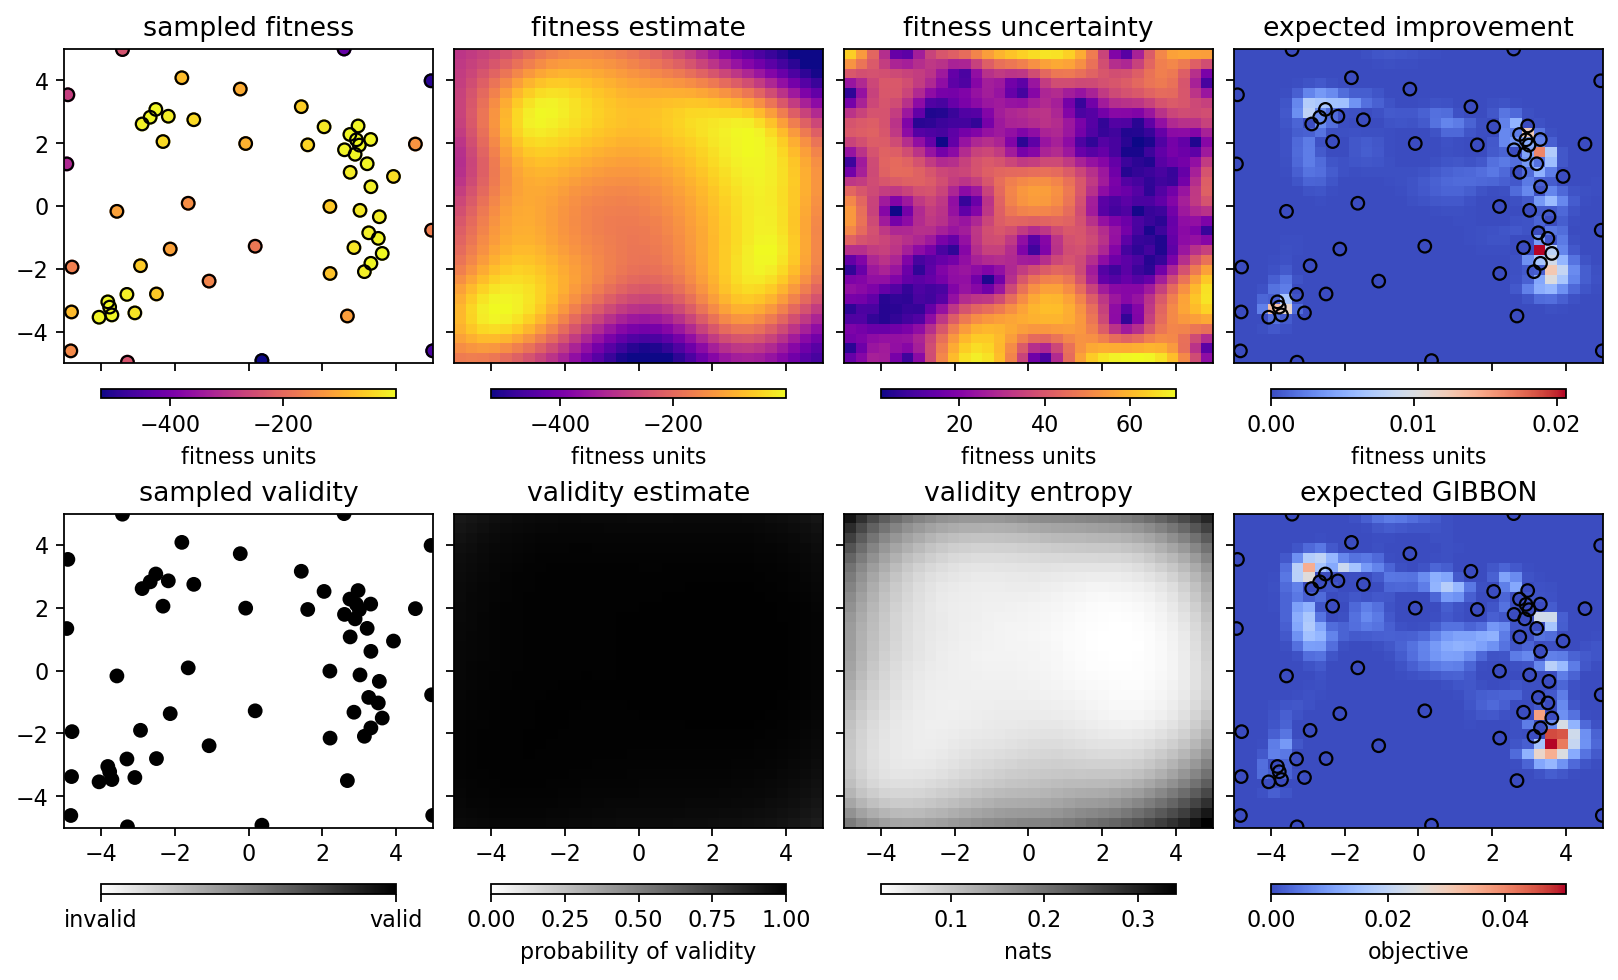

In [6]:
RE(boa.learn(strategy='eGIBBON', n_iter=8, n_per_iter=4))
boa.plot_state(gridded=True)